# Description:

* This notebook goes through the plotting of CRISPR loci

### Before running this notebook:

* __run the [Setup](./Setup.pynb) notebook__

# User-defined variables

In [1]:
# directory where you want the spacer blasting to be done
## CHANGE THIS!
workDir = "/home/nyoungb2/t/CLdb_Methanosarcina/loci_plots/"

# Init

In [2]:
import os
from IPython.display import Image

In [3]:
if not os.path.isdir(workDir):
    os.makedirs(workDir)

In [4]:
# checking that CLdb is in $PATH & ~/.CLdb config file is set up
!CLdb --config-params

#-- Config params --#
DATABASE = /home/nyoungb2/t/CLdb_Methanosarcina/CLdb.sqlite


# Plotting loci

* As with arrayBlast, `plotLoci` has subcommands of it's own

In [5]:
!CLdb -- plotLoci -h

Usage:
    plotLoci [options] subcommand -- [subcommand_options]

  Options:
    --list
        List all subcommands.

    --perldoc
        Get perldoc of subcommand.

    -v Verbose output
    -h This help message

  For more information:
    CLdb --perldoc -- plotLoci



In [6]:
!CLdb -- plotLoci --list

format_dna_segs_colors
make_comparison
make_dna_segs
make_xlims
order_by_tree
prune_tree
rotate_tree
run


## Basics on how a plot is made

* Note: some steps are optional (like mapping loci plots to a tree)

1. Make a table of spacer/DR sequence locations & other info.
  * A 'dna_segs' table
1. [optional] order the table by a tree file
1. [optional] add color info to the table
1. Make a table of the range limits for each locus.
  * ie., the start & stop positions of each plot
  * An 'xlims' table
1. [optional] order the table by a tree file.
1. Make a comparison file to compare sequence similarity among loci.
  * A 'compare' table
1. Feed all of the tables into an R script for making the figure.

# Making the plot

## dna_segs table

In [15]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_dna_segs > dna_segs.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 5 dna_segs.txt

...Found multiple loci for 1 or more taxa. Adding loci_ids to names in dna_segs table!
...Found multiple subtypes. Adding subtype to names in dna_segs table!

name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
9	800384	800419	1	759	1	0.5	8	1	blocks	Methanosarcina_mazei_LYC	14	spacer	9	NA	Methanosarcina_mazei_LYC__14__NA
32	802055	802092	1	225	1	0.5	8	1	blocks	Methanosarcina_mazei_LYC	14	spacer	32	NA	Methanosarcina_mazei_LYC__14__NA
25	801549	801585	1	608	1	0.5	8	1	blocks	Methanosarcina_mazei_LYC	14	spacer	25	NA	Methanosarcina_mazei_LYC__14__NA
14	800751	800788	1	318	1	0.5	8	1	blocks	Methanosarcina_mazei_LYC	14	spacer	14	NA	Methanosarcina_mazei_LYC__14__NA


### Ordering dna_segs by tree

In [17]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- order_by_tree \
        -tree Methanosarcina.nwk \
        < dna_segs.txt \
        > dna_segs_ord.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 dna_segs_ord.txt

Editted tree written: Methanosarcina_edit.nwk

name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
64	894719	894754	1	727	1	0.5	8	1	blocks	Methanosarcina_mazei_C16	9	spacer	64	I-B	Methanosarcina_mazei_C16__9__I-B
31	892324	892358	1	950	1	0.5	8	1	blocks	Methanosarcina_mazei_C16	9	spacer	31	I-B	Methanosarcina_mazei_C16__9__I-B


### Adding coloring info

In [18]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- format_dna_segs_colors \
    < dna_segs_ord.txt \
    > dna_segs_ord_col.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 dna_segs_ord_col.txt


name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
8	890620	890657	1	#000000	1	0.1	8	1	blocks	Methanosarcina_mazei_C16	9	directrepeat	8	I-B	Methanosarcina_mazei_C16__9__I-B
28	892069	892106	1	#000000	1	0.1	8	1	blocks	Methanosarcina_mazei_C16	9	directrepeat	28	I-B	Methanosarcina_mazei_C16__9__I-B


## xlims table

In [19]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_xlims > xlims.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 5 xlims.txt

...Found multiple loci for 1 or more taxa. Adding leaves to the tree! Adding loci_ids to leaves & xlims table!
...Found multiple subtypes. Adding subtype to names in tree & xlims table!

start	end	taxon_name	locus_id	subtype	dna_segs_id
890817	903201	Methanosarcina_mazei_WWM610	20	I-B	Methanosarcina_mazei_WWM610__20__I-B
1610239	1627817	Methanosarcina_mazei_WWM610	19	III-B	Methanosarcina_mazei_WWM610__19__III-B
889926	906212	Methanosarcina_mazei_S_6	15	I-D	Methanosarcina_mazei_S_6__15__I-D
1620118	1634344	Methanosarcina_mazei_S_6	16	III-C	Methanosarcina_mazei_S_6__16__III-C


### Ordering by tree

In [20]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- order_by_tree \
        -tree Methanosarcina.nwk \
        < xlims.txt \
        > xlims_ord.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 xlims_ord.txt

Editted tree written: Methanosarcina_edit.nwk

start	end	taxon_name	locus_id	subtype	dna_segs_id
3296823	3309235	Methanosarcina_mazei_C16	10	III-B	Methanosarcina_mazei_C16__10__III-B
880835	895591	Methanosarcina_mazei_C16	9	I-B	Methanosarcina_mazei_C16__9__I-B


## Comparisons table

In [21]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_comparison < dna_segs_ord_col.txt

### Getting spacer clusters ###
start1	end1	start2	end2	col	dna_segs_id1	dna_segs_id2	feat	feat_id	sfeat_id


## making figure

In [24]:
!cd $workDir; \
    CLdb -- plotLoci -- run \
    -d dna_segs_ord_col.txt \
    -x xlims_ord.txt \
    -t Methanosarcina_edit.nwk \
    -f png \
    -o all_loci

Read 1 item
Loci plot written: "all_loci"
null device 
          1 


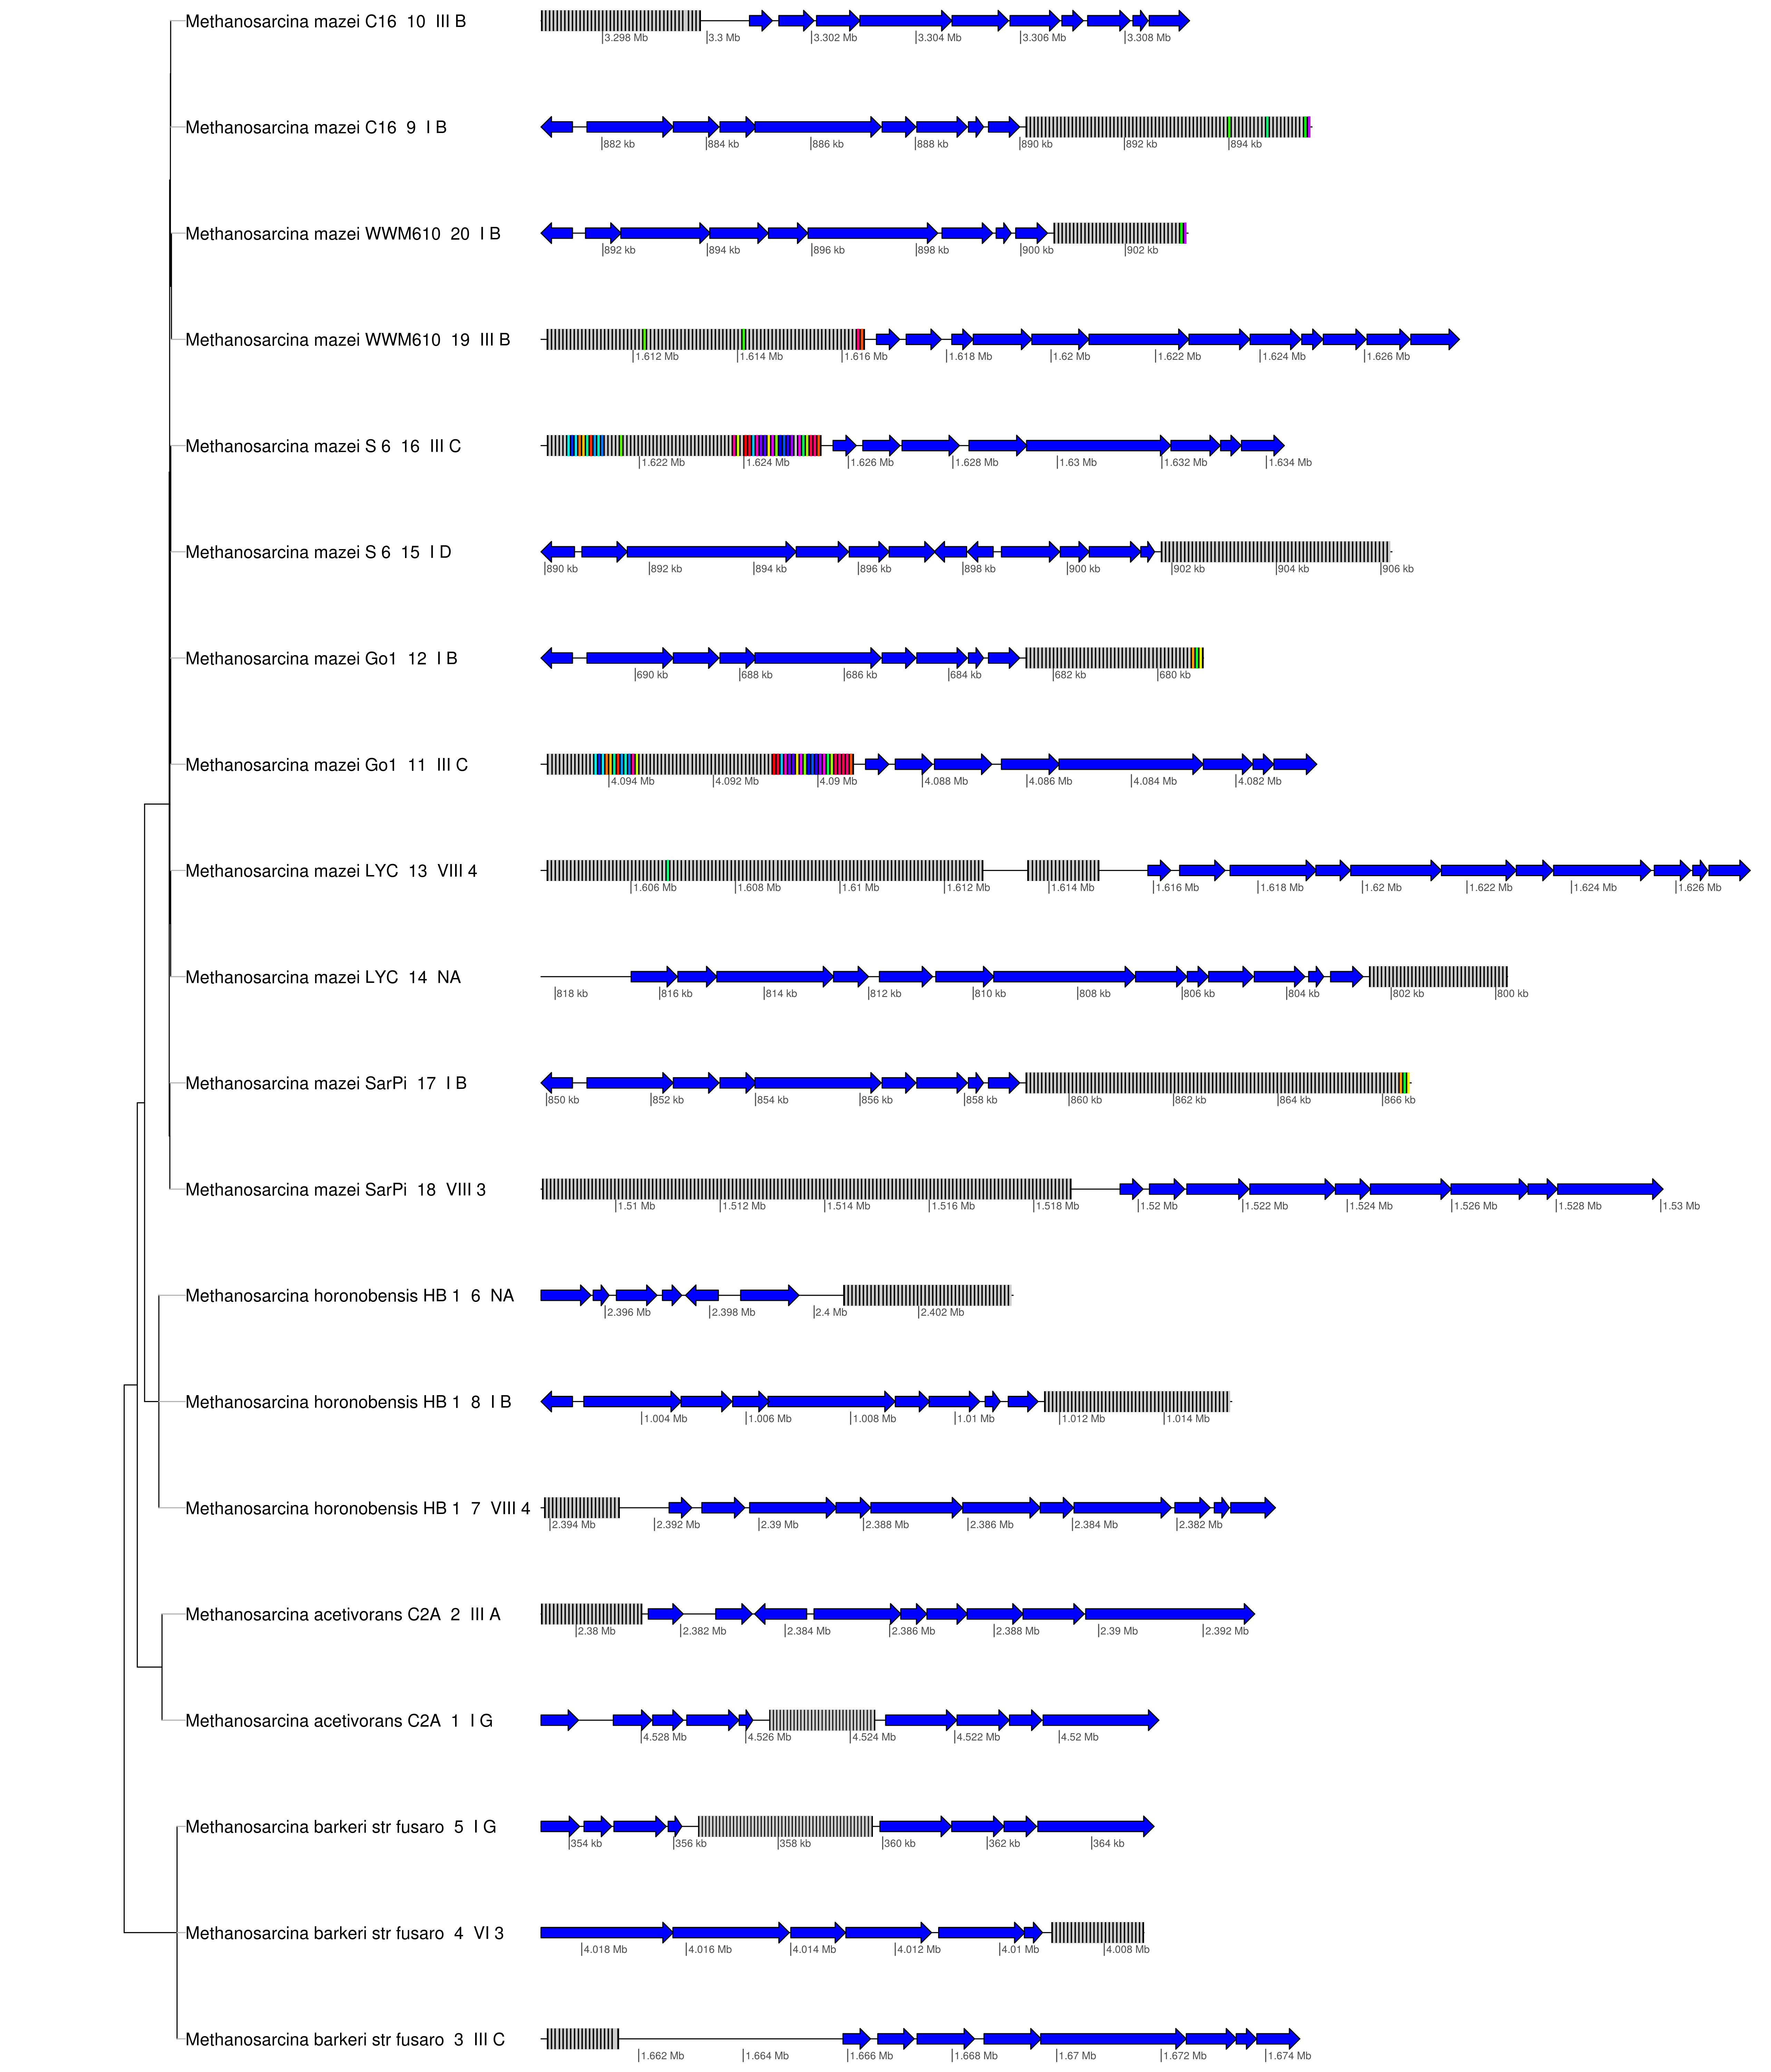

In [25]:
pngFile = os.path.join(workDir, 'all_loci.png')
Image(filename=pngFile)

#### Notes:

* A lot of CRISPR-CAS systems to view!
  * Especially when they are not ordered by a tree.
* Let's just plot 1 CRISPR subtype.

# Plotting I-B CRISPRs

In [93]:
subtype = 'I-B'

## dna_segs table

In [94]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_dna_segs \
    -subtype $subtype \
    > dna_segs.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 dna_segs.txt


name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
37	861819	861854	1	778	1	0.5	8	1	blocks	Methanosarcina_mazei_SarPi	17	spacer	37	I-B	Methanosarcina_mazei_SarPi
10	859862	859901	1	40	1	0.5	8	1	blocks	Methanosarcina_mazei_SarPi	17	spacer	10	I-B	Methanosarcina_mazei_SarPi


### Ordering dna_segs by tree

In [95]:
# prune tree to just taxa in table
!cd $workDir; \
    CLdb -- plotLoci -- prune_tree \
        -dna dna_segs.txt \
        < Methanosarcina.nwk \
        > Methanosarcina_prn.nwk 

#--- Pruning with nw_prune (from newick utilities) ---#
Removing node: Methanosarcina_acetivorans_C2A
Removing node: Methanosarcina_mazei_LYC
Removing node: Methanosarcina_mazei_S_6
Removing node: Methanosarcina_barkeri_str_fusaro


In [96]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- order_by_tree \
        -tree Methanosarcina_prn.nwk \
        < dna_segs.txt \
        > dna_segs_ord.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 dna_segs_ord.txt

Editted tree written: Methanosarcina_prn_edit.nwk

name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
69	895082	895119	1	331	1	0.5	8	1	blocks	Methanosarcina_mazei_C16	9	spacer	69	I-B	Methanosarcina_mazei_C16
40	892972	893009	1	150	1	0.5	8	1	blocks	Methanosarcina_mazei_C16	9	spacer	40	I-B	Methanosarcina_mazei_C16


### Adding coloring info

In [97]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- format_dna_segs_colors \
    < dna_segs_ord.txt \
    > dna_segs_ord_col.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 dna_segs_ord_col.txt


name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
21	891561	891598	1	#000000	1	0.1	8	1	blocks	Methanosarcina_mazei_C16	9	directrepeat	21	I-B	Methanosarcina_mazei_C16
42	893082	893119	1	#000000	1	0.1	8	1	blocks	Methanosarcina_mazei_C16	9	directrepeat	42	I-B	Methanosarcina_mazei_C16


## xlims table

In [98]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_xlims \
    -subtype $subtype \
    > xlims.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 5 xlims.txt


start	end	taxon_name	locus_id	subtype	dna_segs_id
691804	679124	Methanosarcina_mazei_Go1	12	I-B	Methanosarcina_mazei_Go1
849895	866550	Methanosarcina_mazei_SarPi	17	I-B	Methanosarcina_mazei_SarPi
880835	895591	Methanosarcina_mazei_C16	9	I-B	Methanosarcina_mazei_C16
890817	903201	Methanosarcina_mazei_WWM610	20	I-B	Methanosarcina_mazei_WWM610


### Ordering by tree

In [99]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- order_by_tree \
        -tree Methanosarcina_prn.nwk \
        < xlims.txt \
        > xlims_ord.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 3 xlims_ord.txt

Editted tree written: Methanosarcina_prn_edit.nwk

start	end	taxon_name	locus_id	subtype	dna_segs_id
880835	895591	Methanosarcina_mazei_C16	9	I-B	Methanosarcina_mazei_C16
890817	903201	Methanosarcina_mazei_WWM610	20	I-B	Methanosarcina_mazei_WWM610


## Comparisons table

In [100]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_comparison \
        < dna_segs_ord_col.txt \
        > comparisons.txt
        
# checking output
!cd $workDir; \
    echo; \
    head -n 4 comparisons.txt        

### Getting spacer clusters ###

start1	end1	start2	end2	col	dna_segs_id1	dna_segs_id2	feat	feat_id	sfeat_id
895518	895555	903128	903165	100	Methanosarcina_mazei_C16	Methanosarcina_mazei_WWM610	spacer	75	35
895446	895481	903056	903091	100	Methanosarcina_mazei_C16	Methanosarcina_mazei_WWM610	spacer	74	34
679161	679197	866478	866514	100	Methanosarcina_mazei_Go1	Methanosarcina_mazei_SarPi	spacer	1	101


## making figure

In [101]:
!cd $workDir; \
    CLdb -- plotLoci -- run \
    -d dna_segs_ord_col.txt \
    -x xlims_ord.txt \
    -t Methanosarcina_prn_edit.nwk \
    -c comparisons.txt \
    -f png \
    -o $subtype

Read 1 item
Loci plot written: "I-B"
null device 
          1 


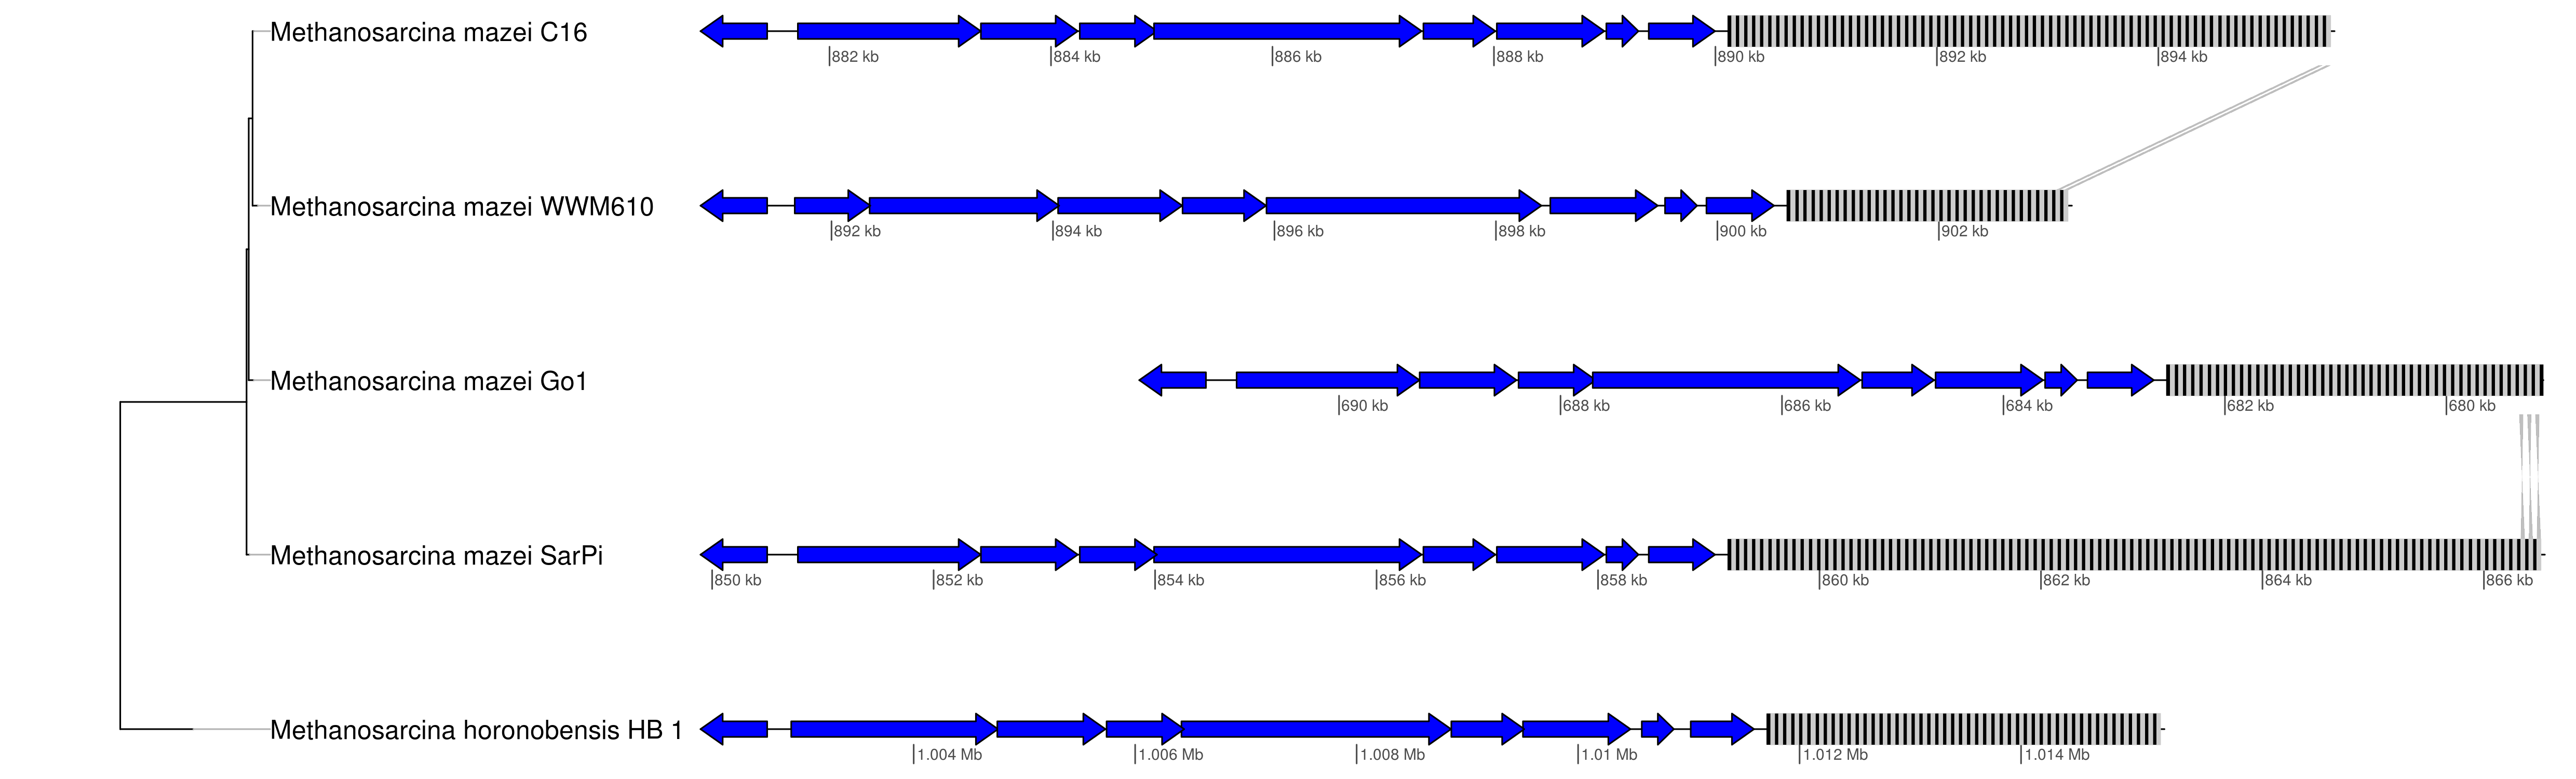

In [102]:
pngFile = os.path.join(workDir, subtype + '.png')
Image(filename=pngFile)